# quora-text-classification-live-zaid
-download and explore data
- apply text classification techniques
-implement bag of words model
- train ML models for text classification
- make predictions and submit to kaggle
Use the "Run" button to execute the code.

##download and explore the data

In [1]:
#import os
#os.environ['KAGGLE_CONFIG_DIR']='.'

In [2]:
#!chmod 600
#!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

In [3]:
#!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data

In [4]:
#train_fname='data/train.csv.zip'
#test_fname='data/test.csv.zip'
#sample_fname='data/sample_submission.csv.zip'

In [5]:
data_dir='/kaggle/input/quora-insincere-questions-classification'
train_fname=data_dir + '/train.csv' 
test_fname=data_dir + '/test.csv' 
sample_fname=data_dir + '/sample_submission.csv' 

In [6]:
import pandas as pd

In [7]:
raw_df=pd.read_csv(train_fname)
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [8]:
sincere_df=raw_df[raw_df.target==0] ##woh wala df deiga jiskay target sirf 0
sincere_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [9]:
sincere_df.question_text.values[:10] ##10 sawaal le aou

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [10]:
insincere_df=raw_df[raw_df.target==1]
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

<AxesSubplot:>

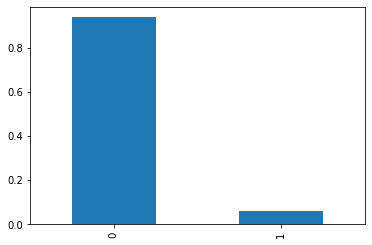

In [11]:
raw_df.target.value_counts(normalize=True).plot(kind='bar') 

In [12]:
samples=100_000
sample_df=raw_df.sample(samples,random_state=42)

In [13]:
q0=raw_df[raw_df.target==0].question_text.values[0]

In [14]:
q0

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [15]:
q1=raw_df[raw_df.target==1].question_text.values[0]

In [16]:
q1

'Has the United States become the largest dictatorship in the world?'

##text preprocessing techniques

In [17]:
 import nltk
 from nltk.tokenize import word_tokenize


In [18]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [19]:
word_tokenize(q0)

['How',
 'did',
 'Quebec',
 'nationalists',
 'see',
 'their',
 'province',
 'as',
 'a',
 'nation',
 'in',
 'the',
 '1960s',
 '?']

In [20]:
q0_tok=word_tokenize(q0)
q1_tok=word_tokenize(q1)

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [22]:
english_stopwords=stopwords.words("english")

In [23]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [24]:
def remove_stopwords(tokens):
  return[word for word in tokens if word.lower() not in english_stopwords]


In [25]:
q0_stp=remove_stopwords(q0_tok)

In [26]:
q0_stp

['Quebec', 'nationalists', 'see', 'province', 'nation', '1960s', '?']

In [27]:
q1_stp=remove_stopwords(q1_tok)
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [28]:
from nltk.stem.snowball import SnowballStemmer
stemmer =SnowballStemmer(language='english')

In [29]:
stemmer.stem('going')

'go'

In [30]:
q0_stm=[stemmer.stem(word) for word in q0_stp]

In [31]:
q0_stp

['Quebec', 'nationalists', 'see', 'province', 'nation', '1960s', '?']

In [32]:
q0_stm

['quebec', 'nationalist', 'see', 'provinc', 'nation', '1960s', '?']

In [33]:
q1_stm=[stemmer.stem(word) for word in q1_stp]

[link text](https://)## text preprocessing techniques

##implement bag of words
     

In [34]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [35]:
small_df=sample_df[:5]

In [36]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [37]:
 from sklearn.feature_extraction.text import CountVectorizer

In [38]:
small_vect=CountVectorizer()

In [39]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [40]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [41]:
vectors=small_vect.transform(small_df.question_text)

In [42]:
vectors.shape

(5, 51)

In [43]:
stemmer =SnowballStemmer(language='english')

def tokenize(text):
  return[ word for word in word_tokenize(text)]


In [44]:
vectorizer=CountVectorizer(lowercase=True,
                           tokenizer=tokenize,
                           stop_words=english_stopwords,
                           max_features=1000)

In [45]:
vectorizer.fit(sample_df.question_text)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fe5c0099b00>)

In [46]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'re", "'s", "'ve", '(', ')',
       '+', ',', '-', '.', '1', '10', '100', '11', '12', '12th', '15',
       '2', '20', '2017', '2018', '3', '30', '4', '5', '6', '7', '8', ':',
       ';', '?', '[', ']', '``', 'able', 'abroad', 'accept', 'access',
       'accomplishments', 'according', 'account', 'act', 'actually',
       'add', 'admission', 'adult', 'advanced', 'advantages', 'advice',
       'affect', 'africa', 'african', 'age', 'ago', 'air', 'allow',
       'allowed', 'almost', 'alone', 'along', 'already', 'also', 'always',
       'amazon', 'america', 'american', 'americans', 'among', 'amount',
       'analysis', 'ancient', 'android', 'animal', 'animals', 'anime',
       'another', 'answer', 'answers', 'anxiety', 'anyone', 'anything',
       'app', 'apple', 'application', 'apply', 'apps', 'area', 'army',
       'around', 'art', 'asian', 'ask', 'asked', 'attack'], dtype=object)

In [47]:
inputs=vectorizer.transform(sample_df.question_text)

In [48]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [49]:
test_df=pd.read_csv(test_fname)


test_inputs=vectorizer.transform(test_df.question_text)

## ml models for text classification

In [50]:
 from sklearn.model_selection import train_test_split


In [51]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs,
                                                                   sample_df.target,test_size=0.3,random_state=42)

In [52]:
 from sklearn.linear_model import LogisticRegression


In [53]:
MAX_ITER=1000

In [54]:
model=LogisticRegression(max_iter=1000,solver='sag')

In [55]:
model.fit(train_inputs,train_targets)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(max_iter=1000, solver='sag')

##make predictions using the model

In [56]:
train_preds=model.predict(train_inputs)

In [57]:
pd.Series(train_preds).value_counts()

0    68211
1     1789
dtype: int64

In [58]:
pd.Series(train_targets).value_counts()

0    65784
1     4216
Name: target, dtype: int64

In [59]:
 from sklearn.metrics import accuracy_score


In [60]:
accuracy_score(train_targets,train_preds)

0.9473

In [61]:
from sklearn.metrics import f1_score

In [62]:
f1_score(train_targets,train_preds)

0.38567860116569525

In [63]:
val_preds=model.predict(val_inputs)

In [64]:
accuracy_score(val_targets,val_preds)

0.9447666666666666

In [65]:
f1_score(val_targets,val_preds)

0.35849787069299266

In [66]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [67]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

##make predictions and submit to kaggle

In [70]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [71]:
test_inputs.shape

(375806, 1000)

In [72]:
test_preds=model.predict(test_inputs)

In [73]:
sub_df=pd.read_csv(sample_fname)

In [74]:
sub_df.prediction=test_preds

In [75]:
sub_df.prediction.value_counts()

0    366381
1      9425
Name: prediction, dtype: int64

In [76]:
sub_df.to_csv('submission.csv',index=None)